In [ ]:
!python --version

Python 3.7.3


# Code Behind In Action Article Series on Medium

In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

# set font size
plt.rcParams['font.size'] = 24

%matplotlib inline
# to include graphs inline within the frontends next to code

%config InlineBackend.figure_format='retina'
#to enable high resolution plots

## Load Data

In [ ]:
life_exp_dataset = pd.read_csv(
    "https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv")

## Central Limit Theorem In Action

### Filter for Most Recent Data

In [ ]:
life_exp_2018 = life_exp_dataset[life_exp_dataset["time"] == 2018]

In [ ]:
print("Number of countries included in the dataset:", 
      life_exp_2018["geo"].nunique())

Number of countries included in the dataset: 186


In [ ]:
print("Mean of Average Life Expectancy in the World:", 
      round(life_exp_2018["life_expectancy_years"].mean(),0))

Mean of Average Life Expectancy in the World: 73.0


In [ ]:
print("Standard Deviation of Average Life Expectancy in the World:", 
      round(life_exp_2018["life_expectancy_years"].std(),2))

Standard Deviation of Average Life Expectancy in the World: 7.0


### Histogram of Life Expectancy in the World, as of 2018

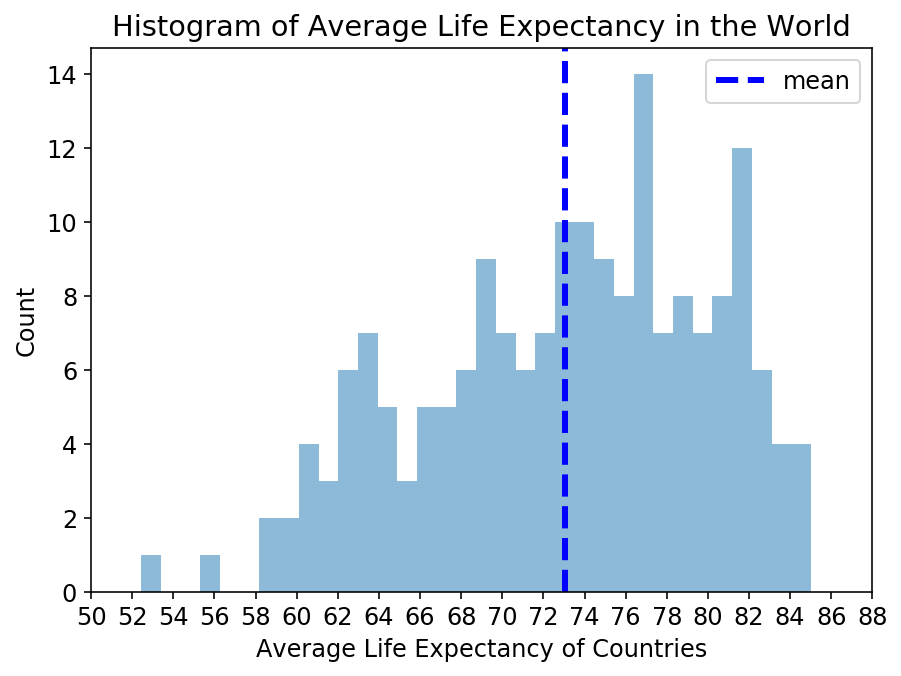

In [ ]:
# set font size
plt.rcParams['font.size'] = 12

# prepare plot
f, axes = plt.subplots(figsize=(7, 5))

# set the histogram
plt.hist(life_exp_2018.life_expectancy_years, 
         range=(life_exp_2018.life_expectancy_years.min(),
                life_exp_2018.life_expectancy_years.max()+1), 
         bins=35, 
         alpha=0.5) 

plt.axvline(x=life_exp_2018.life_expectancy_years.mean(), 
            linewidth=3, 
            ls = "--",
            color='b', 
            label="mean")

# set title and labels
axes.set_xticks(range(50, 90, 2))
plt.xlabel("Average Life Expectancy of Countries") 
plt.ylabel("Count") 
plt.title("Histogram of Average Life Expectancy in the World") 
plt.legend(["mean"])
plt.show()

### Distribution of Life Expectancy in the World, as of 2018

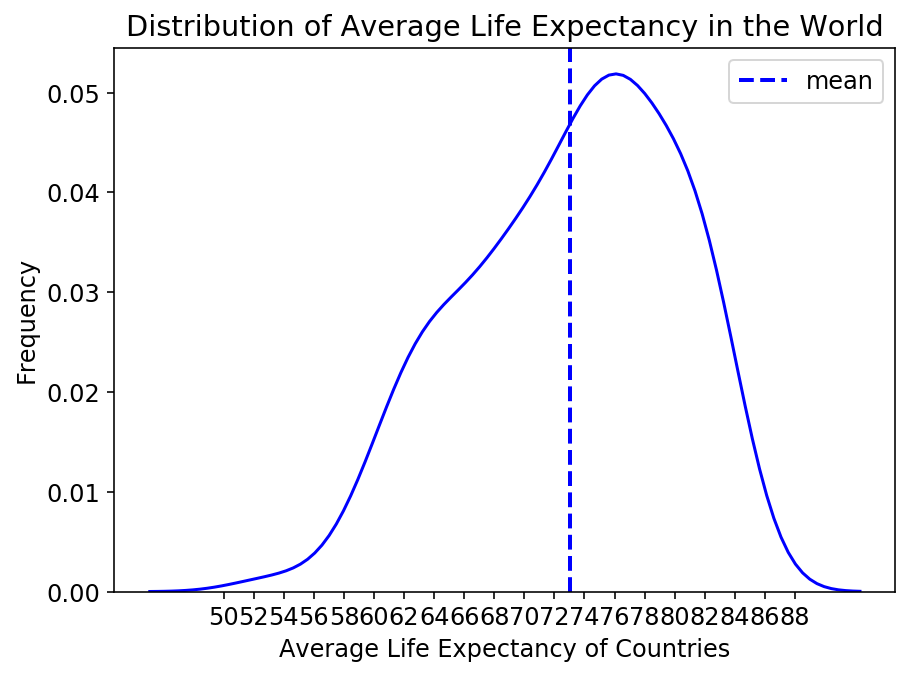

In [ ]:
# set font size
plt.rcParams['font.size'] = 12

# prepare plot
f, axes = plt.subplots(figsize=(7, 5))

# set distribution plot, title and labels
ax = sns.distplot(life_exp_2018.life_expectancy_years, 
                  hist=False, 
                  color="b", 
                  bins=35)

plt.axvline(x=life_exp_2018.life_expectancy_years.mean(), 
            linewidth=2, 
            ls = "--",
            color='b', 
            label="mean")

axes.set_xticks(range(50, 90, 2))
plt.xlabel("Average Life Expectancy of Countries") 
plt.ylabel("Frequency") 
plt.title("Distribution of Average Life Expectancy in the World") 
plt.legend(["mean"])
plt.show()

### Create Sampling Distribution <br/>
**Take random samples of size 150 from the population for 1000 times**

In [ ]:
sampling_distribution = []

for i in range(1000):
    sample_mean = (life_exp_2018
                   .sample(n=150, 
                   replace=True)
                   .life_expectancy_years.mean())
    
    sampling_distribution.append(sample_mean)

In [ ]:
# convert the list to an array
sampling_distribution = np.asarray(sampling_distribution)

In [ ]:
print("Mean of the Sampling Distribution:", 
      round(sampling_distribution.mean(),0))

Mean of the Sampling Distribution: 73.0


In [ ]:
print("Standard Deviation of the Sampling Distribution:", 
      round(sampling_distribution.std(),2))

Standard Deviation of the Sampling Distribution: 0.57


### Visualize Sampling Distribution

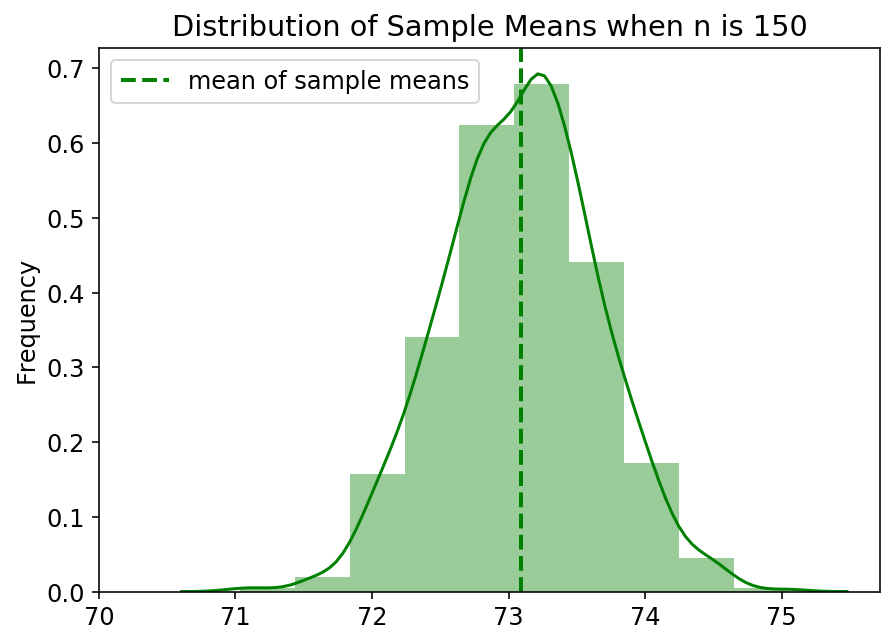

In [ ]:
# set font size
plt.rcParams['font.size'] = 12

# prepare plot
f, axes = plt.subplots(figsize=(7, 5))

# set distribution plot, title and labels
ax = sns.distplot(sampling_distribution, 
                  hist=True, 
                  color="g", 
                  bins=10)

plt.axvline(x=sampling_distribution.mean(), 
            linewidth=2, 
            ls = "--",
            color='g', 
            label="mean of sampling distribution")

axes.set_xticks(range(70, 76))
plt.ylabel("Frequency") 
plt.title("Distribution of Sample Means when n is 150") 
plt.legend(["mean of sample means"])
plt.show()

### Calculate Standard Error

In [ ]:
# population standard deviation
standard_deviation = round(
    life_exp_2018["life_expectancy_years"].std(), 2)

# sample size and standard errror
n = 150
standard_error = (standard_deviation / np.sqrt(n))

print("Calculated standard error of the sampling distribution is:", 
      round(standard_error, 2))
print("Standard error of the sampling distribution is:", 
      round(sampling_distribution.std(), 2))

Calculated standard error of the sampling distribution is: 0.57
Standard error of the sampling distribution is: 0.57


## Statistical Significance In Action

In [ ]:
# set mean and standard deviation of the population
mean = life_exp_2018["life_expectancy_years"].mean()
standard_deviation = life_exp_2018["life_expectancy_years"].std()

In [ ]:
# standardize life_exp_2018 distribution
life_exp_2018_array = np.asarray(life_exp_2018.life_expectancy_years)
std_life_exp_2018 = (life_exp_2018_array - mean) / standard_deviation

### Life Expectancy in France, as of 2018

In [ ]:
life_exp_2018[life_exp_2018["geo"] == "fra"]

,geo,time,life_expectancy_years
17170,fra,2018,82.95


In [ ]:
# z-score of France
z_score_fra = (83 - mean) / standard_deviation
print("Z-score of France is" , 
      round(z_score_fra, 2))

Z-score of France is 1.42


### Z-score of the Island of Intermittent Fasting

In [ ]:
# calculate z-score and p-value
z_score = (76 - mean) / (standard_deviation / np.sqrt(50))
p_value = 1 - ss.norm.cdf(z_score)

print("Z-score of the island is {z_score} and p-value is {p_value}.".
      format(z_score = round(z_score, 2), p_value = round(p_value, 4)))

Z-score of the island is 2.97 and p-value is 0.0015.


### Alpha-1

In [ ]:
alpha_significant = 0.05
z_score_alpha_s = -1 * ss.norm.ppf(alpha_significant)
print("Z-score of the p-value {p_value} is {z_score}".
      format(p_value = alpha_significant, 
             z_score = round(z_score_alpha_s, 2)))

Z-score of the p-value 0.05 is 1.64


### Visualize P-value

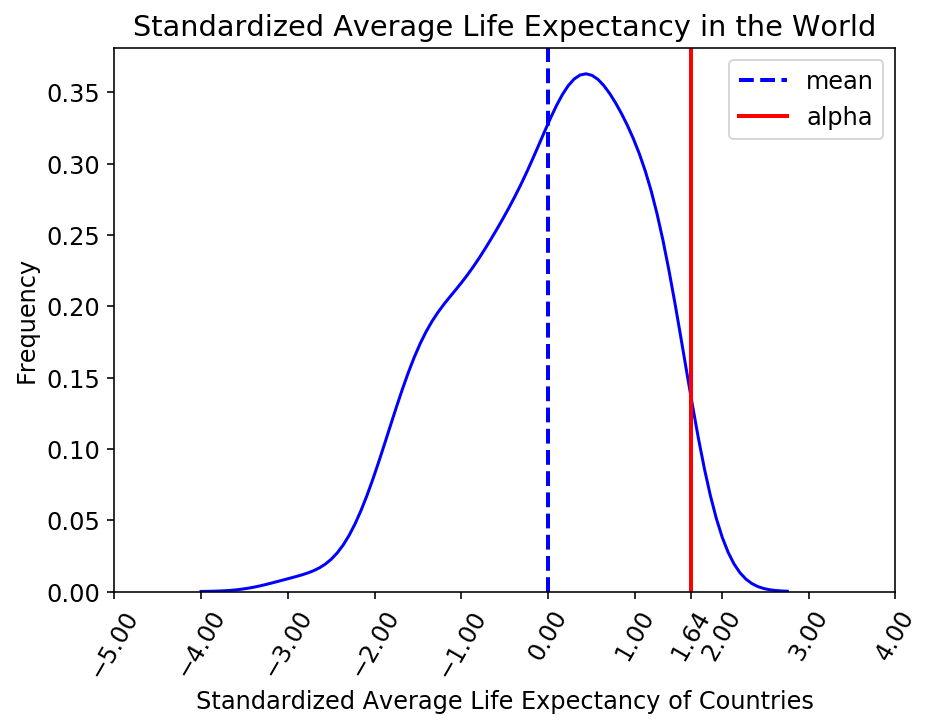

In [ ]:
# set font size
plt.rcParams['font.size'] = 12

# prepare plot
f, axes = plt.subplots(figsize=(7, 5))

# set distribution plot, title and labels
ax = sns.distplot(std_life_exp_2018, 
                  kde = True,
                  hist = False,
                  color="b", 
                  bins=35)

plt.axvline(x=std_life_exp_2018.mean(), 
            linewidth = 2,
            ls = "--",
            color= "b",
            label="mean")

plt.axvline(x=z_score_alpha_s, 
            linewidth=2, 
            color='r', 
            label="alpha")

# add alpha to the plot
axes.set_xticks(range(-5, 5))
x_ticks = np.around(np.append(ax.get_xticks(), z_score_alpha_s), decimals=2) 
ax.set_xticks(x_ticks)

# set title and x, y labels
plt.xlabel("Standardized Average Life Expectancy of Countries") 
plt.ylabel("Frequency") 
plt.title("Standardized Average Life Expectancy in the World") 
plt.legend(["mean", "alpha"])
plt.xticks(rotation=60)
plt.show()

### Visualize P-value and Test Statistics

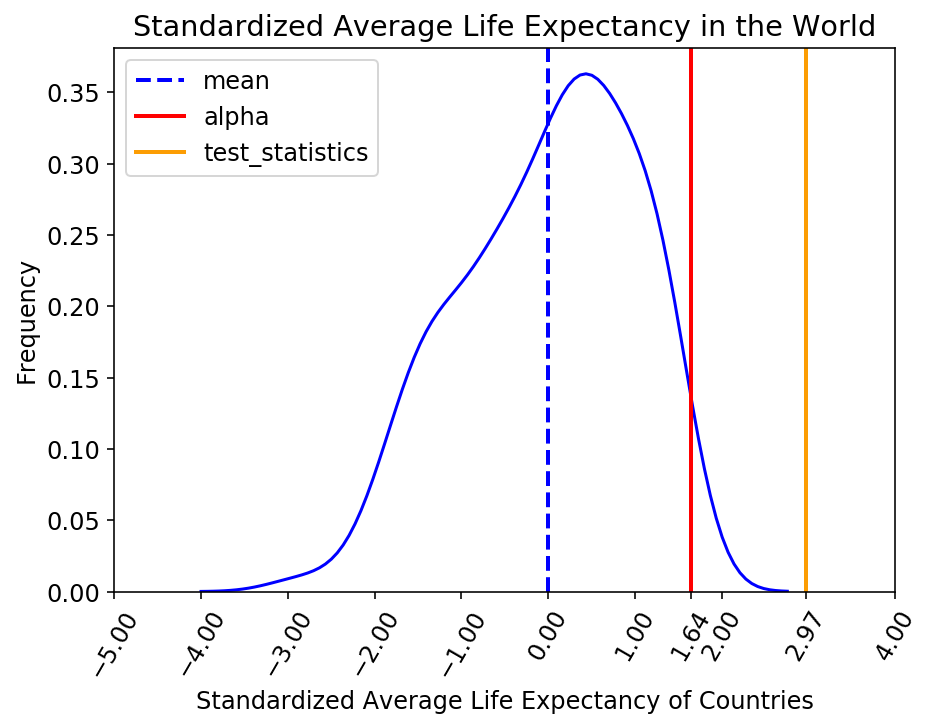

In [ ]:
# set font size
plt.rcParams['font.size'] = 12

# prepare plot
f, axes = plt.subplots(figsize=(7, 5))

# set distribution plot, title and labels
ax = sns.distplot(std_life_exp_2018, 
                  kde = True,
                  hist = False,
                  color="b", 
                  bins=35)

plt.axvline(x=std_life_exp_2018.mean(), 
            linewidth = 2,
            ls = "--",
            color= "b",
            label="mean")

plt.axvline(x=z_score_alpha_s, 
            linewidth=2, 
            color='r', 
            label="alpha")

plt.axvline(x=z_score, 
            linewidth=2, 
            color='#fc9d03', 
            label="test statistics")

# add alpha to the plot
axes.set_xticks([-5, -4, -3, -2, -1, 0, 1, 2, 4])
x_ticks1 = np.append(ax.get_xticks(), z_score_alpha_s)
x_ticks2 = np.around(np.append(x_ticks1, z_score), decimals=2)
ax.set_xticks(x_ticks2)

# set title and x, y labels
plt.xlabel("Standardized Average Life Expectancy of Countries") 
plt.ylabel("Frequency") 
plt.title("Standardized Average Life Expectancy in the World") 
plt.legend(["mean", "alpha", "test_statistics"])
plt.xticks(rotation=60)
plt.show()

### Alpha-2

In [ ]:
alpha_not_significant = 0.001
z_score_alpha_not_s = -1 * ss.norm.ppf(alpha_not_significant)
print("Z-score of the p-value {p_value} is {z_score}".
      format(p_value = alpha_not_significant, 
             z_score = round(z_score_alpha_not_s, 2)))

Z-score of the p-value 0.001 is 3.09


### Not Significant Case

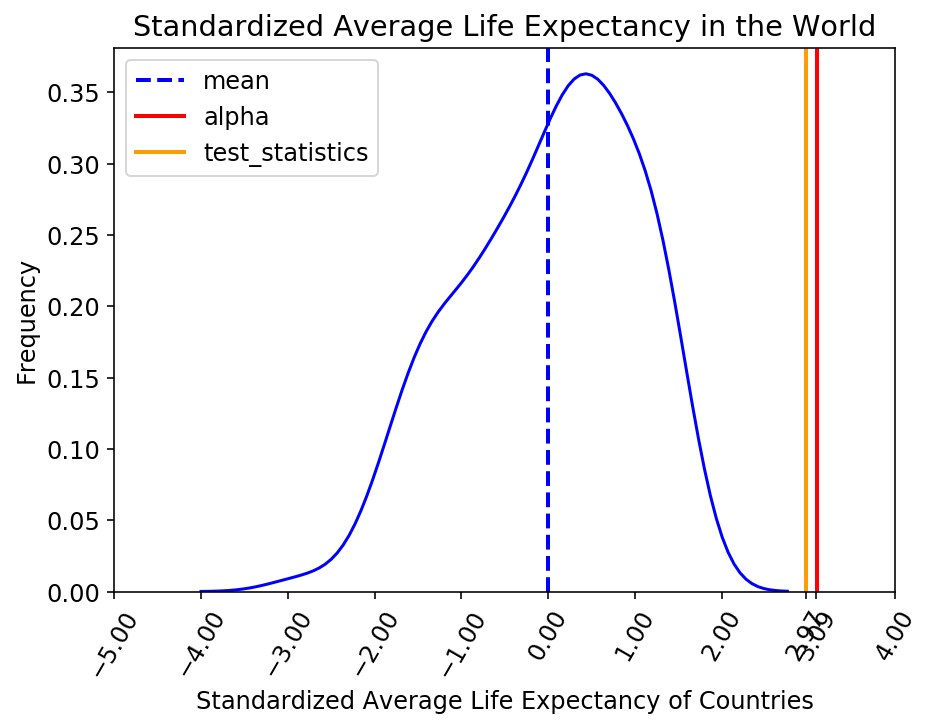

In [ ]:
# set font size
plt.rcParams['font.size'] = 12

# prepare plot
f, axes = plt.subplots(figsize=(7, 5))

# set distribution plot, title and labels
ax = sns.distplot(std_life_exp_2018, 
                  kde = True,
                  hist = False,
                  color="b", 
                  bins=35)

plt.axvline(x=std_life_exp_2018.mean(), 
            linewidth = 2,
            ls = "--",
            color= "b",
            label="mean")

plt.axvline(x=z_score_alpha_not_s, 
            linewidth=2, 
            color='r', 
            label="alpha")

plt.axvline(x=z_score, 
            linewidth=2, 
            color='#fc9d03', 
            label="test statistics")

# add alpha to the plot
axes.set_xticks([-5, -4, -3, -2, -1, 0, 1, 2, 4])
x_ticks1 = np.append(ax.get_xticks(), z_score_alpha_not_s)
x_ticks2 = np.around(np.append(x_ticks1, z_score), decimals=2)
ax.set_xticks(x_ticks2)

# set title and x, y labels
plt.xlabel("Standardized Average Life Expectancy of Countries") 
plt.ylabel("Frequency") 
plt.title("Standardized Average Life Expectancy in the World") 
plt.legend(["mean", "alpha", "test_statistics"])
plt.xticks(rotation=60)
plt.show()